In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime as dt
import dateutil
from sklearn import preprocessing

In [3]:
tomato_data = pd.read_csv("../data/Price of Tomato Karnataka(2016-2018).csv",
                          names= ["Market Area",'Date',"Tonnes","Variety","Minimum Price(Rs./Quintal)",
                                  "Maximum Price(Rs./Quintal)","Modal Price(Rs./Quintal)"], 
                          skiprows = 1,
                          sep = ',', engine = 'python'
                       )

In [4]:
tomato_data.head()

Market Area      Date  Tonnes Variety Minimum Price(Rs./Quintal)  \
0   Bagepalli  2/1/2016     6.0  Tomato                       1000   
1   Bagepalli  4/1/2016     6.0  Tomato                        900   
2   Bagepalli  5/1/2016     6.0  Tomato                       1400   
3   Bagepalli  6/1/2016     4.0  Tomato                       1400   
4   Bagepalli  7/1/2016     5.0  Tomato                       1400   

  Maximum Price(Rs./Quintal) Modal Price(Rs./Quintal)  
0                       1800                     1550  
1                       1800                     1550  
2                       2500                     2200  
3                       3000                     2400  
4                       2600                     2200

In [5]:
tomato_data['Date'].describe()

count          11321
unique           844
top       16/08/2016
freq              24
Name: Date, dtype: object

In [6]:
Arrival_date =pd.to_datetime(tomato_data['Date'], format='%d/%m/%Y')
Arrival_date.head()

0   2016-01-02
1   2016-01-04
2   2016-01-05
3   2016-01-06
4   2016-01-07
Name: Date, dtype: datetime64[ns]

In [7]:
tomato_data['Tonnes'].describe()

count    11321.000000
mean        80.269146
std        154.967086
min          1.000000
25%          4.000000
50%         19.000000
75%         70.000000
max       1931.000000
Name: Tonnes, dtype: float64

In [8]:
df1 = pd.DataFrame()


df1['quantity'] = tomato_data["Tonnes"]
# Create a column from the datetime variable
df1['datetime'] =Arrival_date
# Convert that column into a datetime datatype
df1['datetime'] = pd.to_datetime(df1['datetime'])
# Set the datetime column as the index
df1.index = df1['datetime'] 
df1.head()

quantity   datetime
datetime                       
2016-01-02       6.0 2016-01-02
2016-01-04       6.0 2016-01-04
2016-01-05       6.0 2016-01-05
2016-01-06       4.0 2016-01-06
2016-01-07       5.0 2016-01-07

In [9]:
quantity_dates = df1.resample('M').mean()
quantity_dates['quantity']#.describe()

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/362845310.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quantity_dates = df1.resample('M').mean()


datetime
2016-01-31     43.821875
2016-02-29     59.581081
2016-03-31     51.060976
2016-04-30     56.717808
2016-05-31     42.181081
2016-06-30     52.720000
2016-07-31    129.730193
2016-08-31    192.055249
2016-09-30    113.322368
2016-10-31     90.642674
2016-11-30    102.309469
2016-12-31     68.948357
2017-01-31     46.817175
2017-02-28     43.940054
2017-03-31     47.575000
2017-04-30     77.454094
2017-05-31     73.133188
2017-06-30     91.918367
2017-07-31    101.143541
2017-08-31     83.368778
2017-09-30     70.103774
2017-10-31     59.867168
2017-11-30     59.372449
2017-12-31     93.352357
2018-01-31    103.591981
2018-02-28     83.503916
2018-03-31     67.445255
2018-04-30     59.985714
Name: quantity, dtype: float64

<Axes: ylabel='Count'>

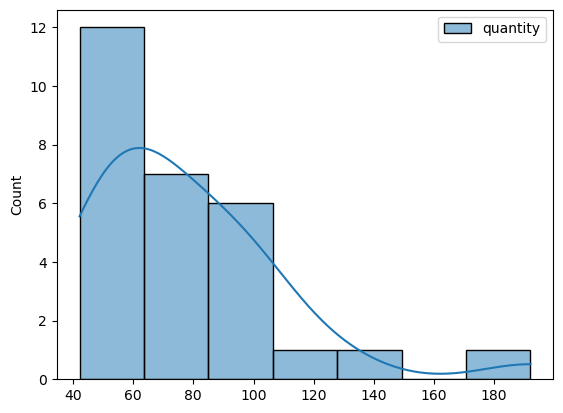

In [10]:
sns.histplot(quantity_dates, bins=7, kde=True, label="Tonnes")

From this we can see that mostly the tomato produce is 40 - 60 tonnes a month, with occasionally touching 200 tonnes (as on 2016-08-31)

In [11]:
#auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
tomato_data['Minimum Price(Rs./Quintal)'].describe()

count     11456
unique      679
top         300
freq       1179
Name: Minimum Price(Rs./Quintal), dtype: object

In [12]:
tomato_data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Minimum Price(Rs./Quintal)'], errors='coerce')
tomato_data['Minimum Price(Rs./Quintal)'].describe()

count    11421.000000
mean       859.348131
std        922.099169
min         22.000000
25%        300.000000
50%        500.000000
75%       1000.000000
max       9000.000000
Name: Minimum Price(Rs./Quintal), dtype: float64

In [13]:
tomato_data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Maximum Price(Rs./Quintal)'], errors='coerce')
tomato_data['Maximum Price(Rs./Quintal)'].describe()

count    11421.000000
mean      1603.457228
std       1381.576640
min        100.000000
25%        600.000000
50%       1000.000000
75%       2100.000000
max      10000.000000
Name: Maximum Price(Rs./Quintal), dtype: float64

In [14]:
tomato_data['Modal Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Modal Price(Rs./Quintal)'], errors='coerce')
tomato_data['Modal Price(Rs./Quintal)'].describe()

count    11421.000000
mean      1268.266001
std       1122.133297
min         70.000000
25%        500.000000
50%        867.000000
75%       1700.000000
max       9000.000000
Name: Modal Price(Rs./Quintal), dtype: float64

In [15]:
df2 = pd.DataFrame()
df2['modal_price'] = tomato_data["Modal Price(Rs./Quintal)"]
df2['datetime'] =Arrival_date
df2['datetime'] = pd.to_datetime(df2['datetime'])
# Set the datetime column as the index
df2.index = df2['datetime'] 
df2.head()


modal_price   datetime
datetime                          
2016-01-02       1550.0 2016-01-02
2016-01-04       1550.0 2016-01-04
2016-01-05       2200.0 2016-01-05
2016-01-06       2400.0 2016-01-06
2016-01-07       2200.0 2016-01-07

In [16]:
price_dates = df2.resample('M').mean()
price_dates.describe()

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/711352284.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_dates = df2.resample('M').mean()


modal_price                       datetime
count    28.000000                             28
mean   1280.881167  2017-03-01 09:23:31.885689600
min     390.492958            2016-01-13 03:18:00
25%     571.639792  2016-08-08 07:03:21.407834368
50%     904.672828  2017-02-28 16:29:16.393361408
75%    1667.135607  2017-09-23 00:51:38.482054144
max    3719.181818  2018-04-13 11:08:34.285714176
std     928.443600                            NaN

<Axes: ylabel='Count'>

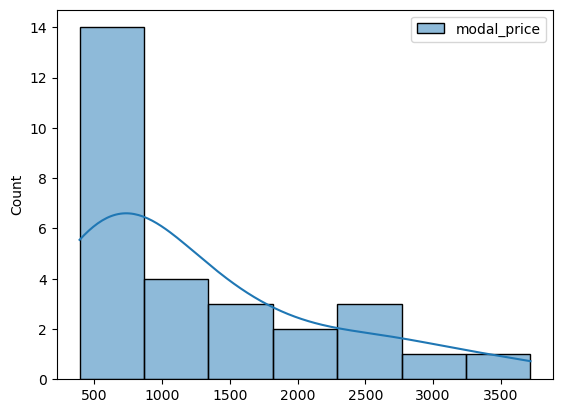

In [17]:
sns.histplot(price_dates, bins=7, kde=True)

From this we find most of the prices between 300 - 700 average Rs 500 per quintall <br>
that means for average 50 tonnes per month market value is approximately (500x50x10 = 250000) -> Rs 2,50,000

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


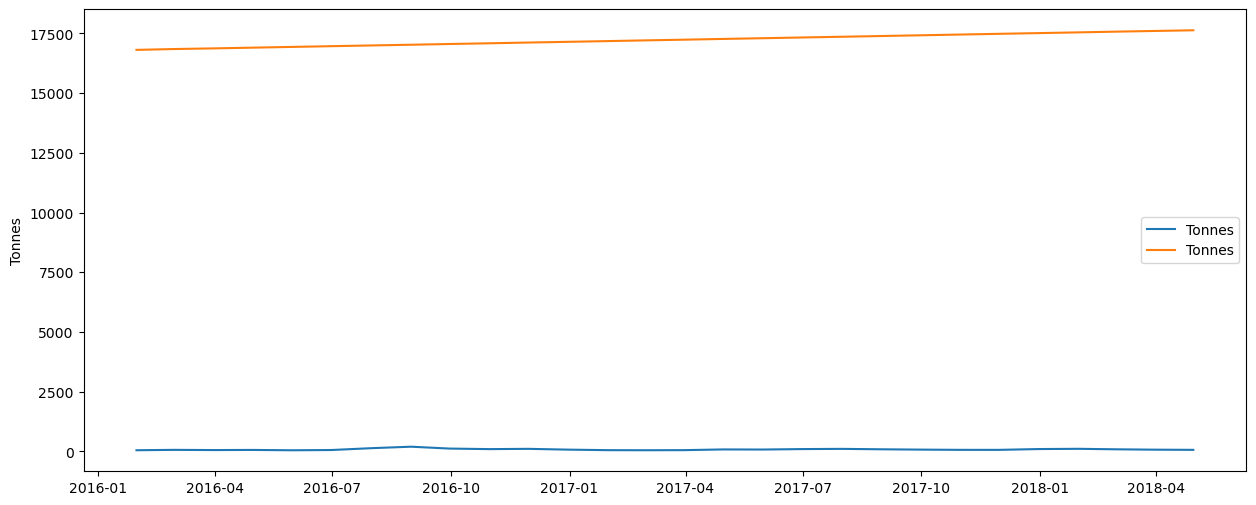

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(quantity_dates, label='Tonnes')
plt.ylabel('Tonnes')

plt.legend()
plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


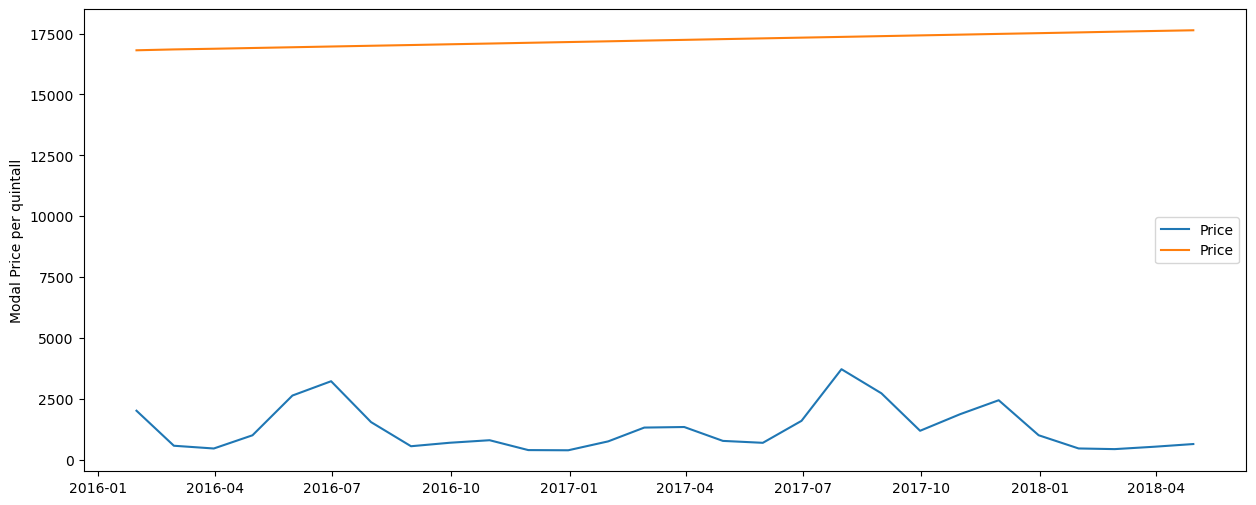

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(price_dates, label='Price')
plt.ylabel('Modal Price per quintall')

plt.legend()
plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


TypeError: cannot perform __mul__ with this index type: DatetimeArray

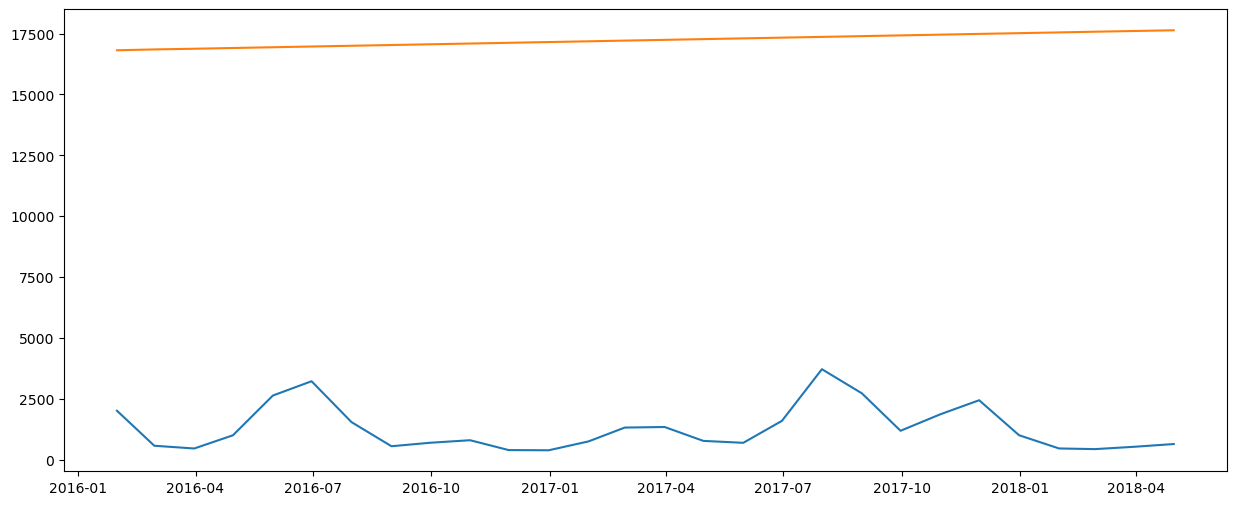

In [20]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(price_dates, label='PRICE')
plt.plot(quantity_dates*10, label='QUINTALL')
#plt.ylabel('numbers')

plt.legend()
plt.show()

From this we can clearly see the rise in prices with fall in supply and vice versa <br>
An intresting thing to note is that in July 2016 there is  sharp rise in prices , and a similar peak is observed in August 2017.<br>
The rise in supply in september is matched with a steep fall in prices.<br>
While in 2017, the supply was maintained below 100 tonnes which has led the prices to be higher than 2016. <br>
Surprisingly, in 2016, the beginnig of the year had high prices, which steadly came down until April. <br>
In 2017 the prices steadly increased from January, until April. <br>
And again in 2018, the prices slowely rise from January to April.<br>

In [21]:
tomato_data[tomato_data.isnull().any(axis=1)].head()

Market Area        Date  Tonnes Variety  Minimum Price(Rs./Quintal)  \
166      Hoskote         NaN     NaN  Tomato                      2000.0   
9037   Bagepalli  21/11/2017    13.0     NaN                         NaN   
9038   Bagepalli  22/11/2017    13.0     NaN                         NaN   
9039   Bagepalli  23/11/2017    14.0     NaN                         NaN   
9040   Bagepalli  25/11/2017    16.0     NaN                         NaN   

      Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
166                       2400.0                    2300.0  
9037                         NaN                       NaN  
9038                         NaN                       NaN  
9039                         NaN                       NaN  
9040                         NaN                       NaN

In [22]:
#tomato_data[tomato_data.isnull().any(axis=1)].head()
tomato_data = tomato_data.dropna()
tomato_data[tomato_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Market Area, Date, Tonnes, Variety, Minimum Price(Rs./Quintal), Maximum Price(Rs./Quintal), Modal Price(Rs./Quintal)]
Index: []

In [23]:
tomato_data.describe()

Tonnes  Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
count  11286.000000                11286.000000                11286.000000   
mean      80.351763                  865.686691                 1614.727096   
std      155.098364                  925.624774                 1385.597676   
min        1.000000                   22.000000                  100.000000   
25%        4.000000                  300.000000                  600.000000   
50%       19.000000                  500.000000                 1000.000000   
75%       70.000000                 1000.000000                 2135.000000   
max     1931.000000                 9000.000000                10000.000000   

       Modal Price(Rs./Quintal)  
count              11286.000000  
mean                1277.500177  
std                 1125.409306  
min                   70.000000  
25%                  500.000000  
50%                  900.000000  
75%                 1748.500000  
max                 9000.000000

Kannakapura / Kolar has higher max price <br>
Somvarpet has higher min price<br>
Similar modal prices

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
variety_tomato_data = tomato_data
variety_tomato_data['Market Area'] = le.fit_transform(tomato_data['Market Area'].astype(str))
variety_tomato_data['Variety'] = le.fit_transform(tomato_data['Variety'].astype(str))
#sns.distplot(variety_tomato_data["Variety"],bins=2,  kde=True, rug=True)

<Axes: xlabel='Variety', ylabel='Count'>

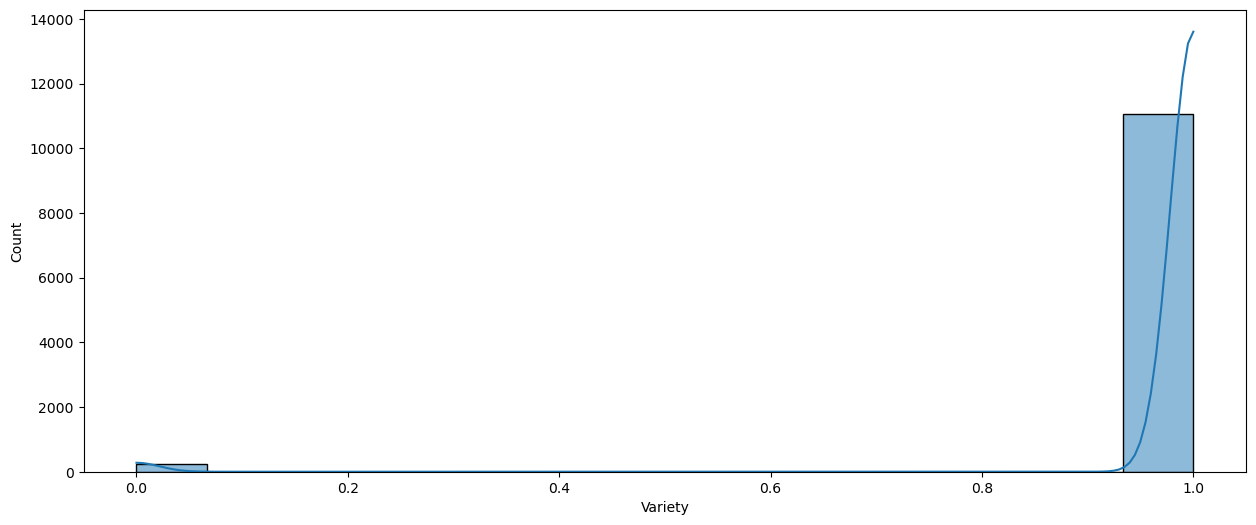

In [26]:
sns.histplot(variety_tomato_data["Variety"], kde=True)

<Axes: xlabel='Market Area', ylabel='Count'>

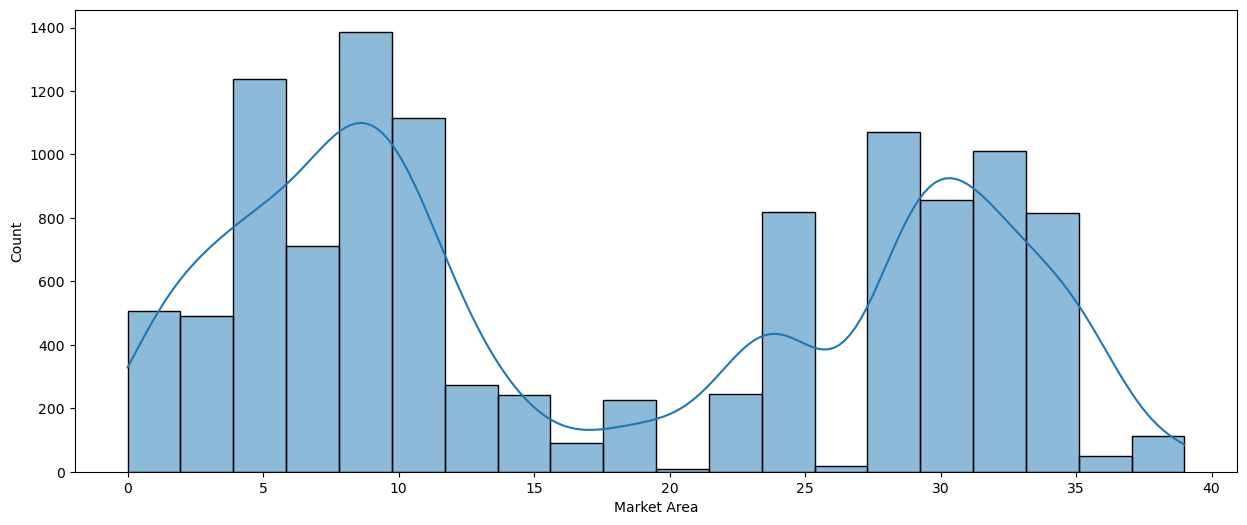

In [27]:
sns.histplot(variety_tomato_data["Market Area"], kde=True)

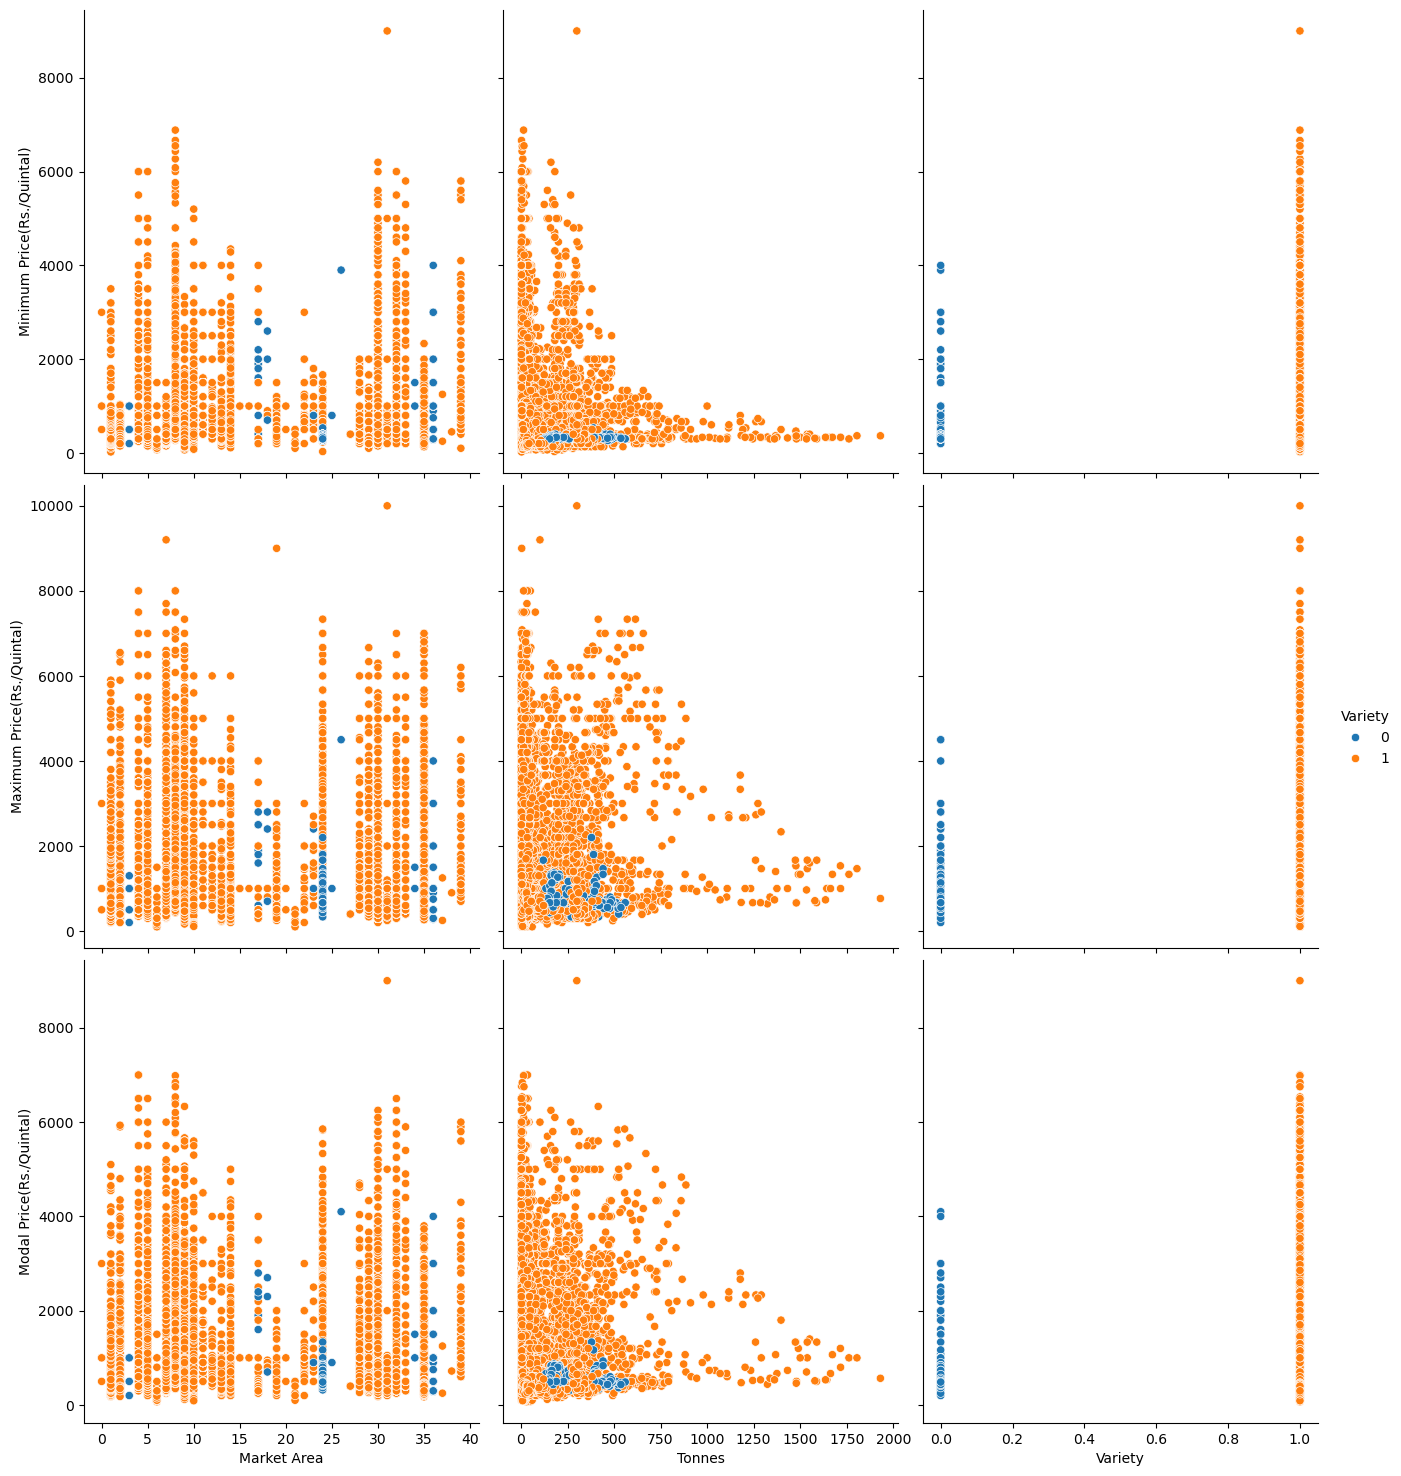

In [28]:
sns.pairplot(tomato_data, height=5, aspect=0.9,
            x_vars = ["Market Area", "Tonnes", "Variety"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
            hue = "Variety")

It is clear that prices of hybdrid is lower that the normal variety

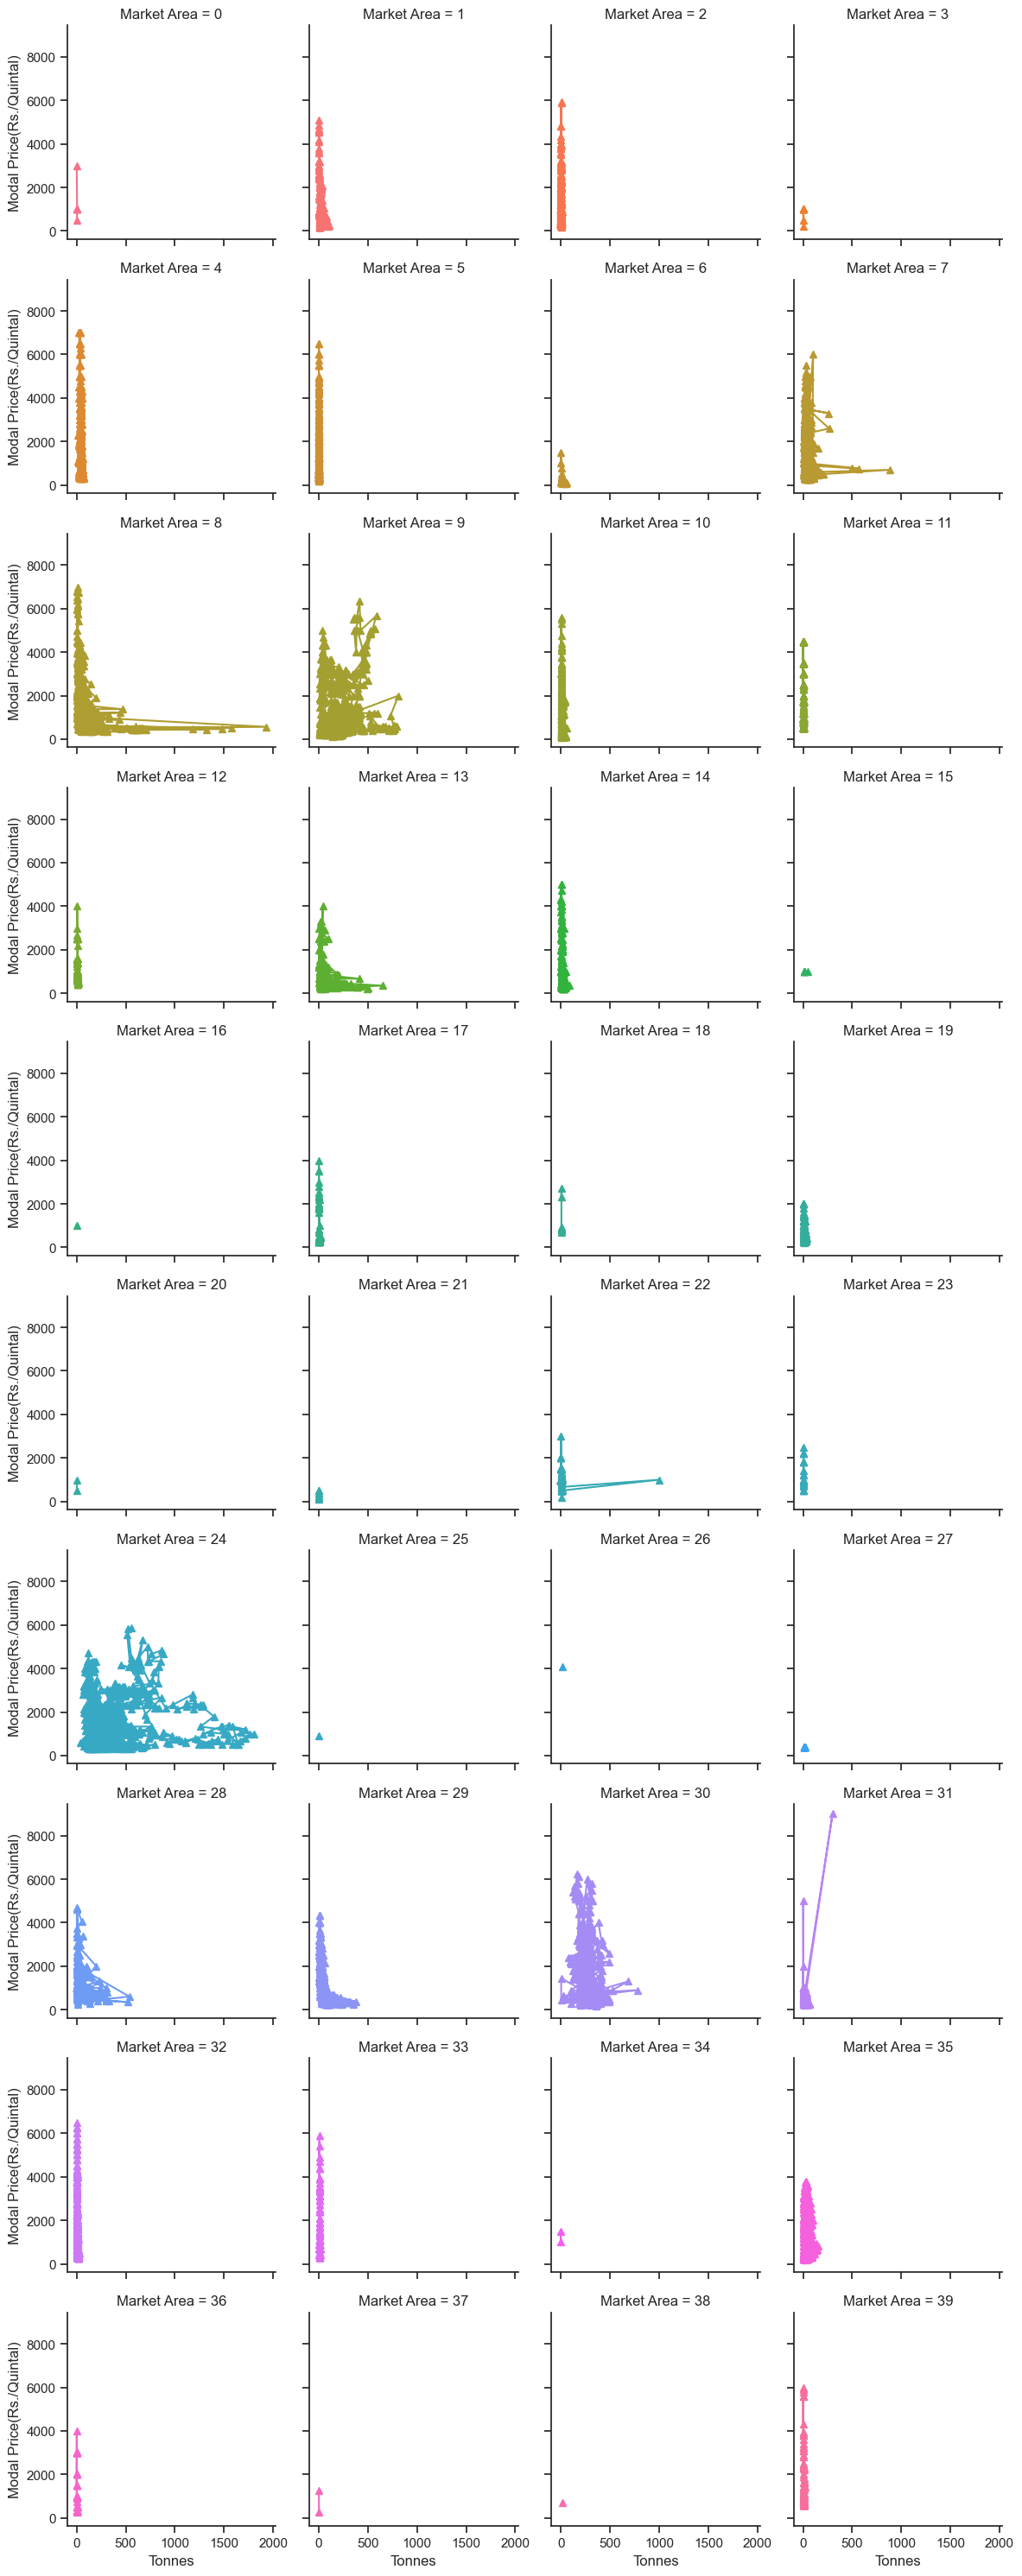

In [29]:
sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(tomato_data, col="Market Area", hue="Market Area",col_wrap=4)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Tonnes","Modal Price(Rs./Quintal)", marker="^")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

We find very less or no data for markets: Kollegal(1), Kudchi(1), Arasikere(3), Holalkere(2), Belur(3), Somvarpet(1), Tumkur(3), T.Narasipura(3), Maddur(3), Tarikere(2), Holenarsipura(1), Hunsur(2)
So  we neglect them and modify data

In [30]:
data = pd.read_csv("../data/Price of Tomato Karnataka(2016-2018).csv",names= ["Market Area",'Date',"Tonnes","Variety","Minimum Price(Rs./Quintal)",
                                  "Maximum Price(Rs./Quintal)","Modal Price(Rs./Quintal)"], skiprows = 1)
data.head()

Market Area      Date  Tonnes Variety Minimum Price(Rs./Quintal)  \
0   Bagepalli  2/1/2016     6.0  Tomato                       1000   
1   Bagepalli  4/1/2016     6.0  Tomato                        900   
2   Bagepalli  5/1/2016     6.0  Tomato                       1400   
3   Bagepalli  6/1/2016     4.0  Tomato                       1400   
4   Bagepalli  7/1/2016     5.0  Tomato                       1400   

  Maximum Price(Rs./Quintal) Modal Price(Rs./Quintal)  
0                       1800                     1550  
1                       1800                     1550  
2                       2500                     2200  
3                       3000                     2400  
4                       2600                     2200

In [31]:
data = data.dropna()
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Market Area, Date, Tonnes, Variety, Minimum Price(Rs./Quintal), Maximum Price(Rs./Quintal), Modal Price(Rs./Quintal)]
Index: []

In [32]:
data.head()

Market Area      Date  Tonnes Variety Minimum Price(Rs./Quintal)  \
0   Bagepalli  2/1/2016     6.0  Tomato                       1000   
1   Bagepalli  4/1/2016     6.0  Tomato                        900   
2   Bagepalli  5/1/2016     6.0  Tomato                       1400   
3   Bagepalli  6/1/2016     4.0  Tomato                       1400   
4   Bagepalli  7/1/2016     5.0  Tomato                       1400   

  Maximum Price(Rs./Quintal) Modal Price(Rs./Quintal)  
0                       1800                     1550  
1                       1800                     1550  
2                       2500                     2200  
3                       3000                     2400  
4                       2600                     2200

In [33]:
data['Modal Price(Rs./Quintal)'] = pd.to_numeric(data['Modal Price(Rs./Quintal)'], errors='coerce')
data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(data['Maximum Price(Rs./Quintal)'], errors='coerce')
data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(data['Minimum Price(Rs./Quintal)'], errors='coerce')

In [34]:
data.describe()

Tonnes  Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
count  11286.000000                11286.000000                11286.000000   
mean      80.351763                  865.686691                 1614.727096   
std      155.098364                  925.624774                 1385.597676   
min        1.000000                   22.000000                  100.000000   
25%        4.000000                  300.000000                  600.000000   
50%       19.000000                  500.000000                 1000.000000   
75%       70.000000                 1000.000000                 2135.000000   
max     1931.000000                 9000.000000                10000.000000   

       Modal Price(Rs./Quintal)  
count              11286.000000  
mean                1277.500177  
std                 1125.409306  
min                   70.000000  
25%                  500.000000  
50%                  900.000000  
75%                 1748.500000  
max                 9000.000000

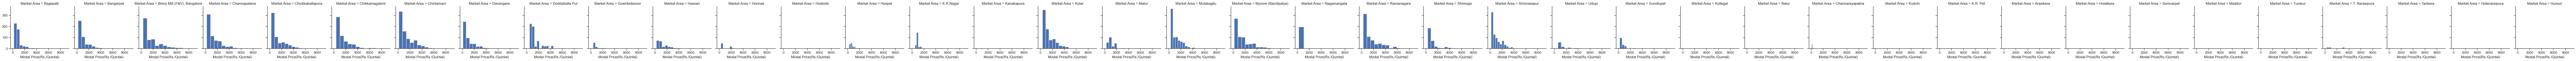

In [35]:
g = sns.FacetGrid(data, col="Market Area")
g.map(plt.hist, "Modal Price(Rs./Quintal)")

<Axes: xlabel='Market Area', ylabel='Count'>

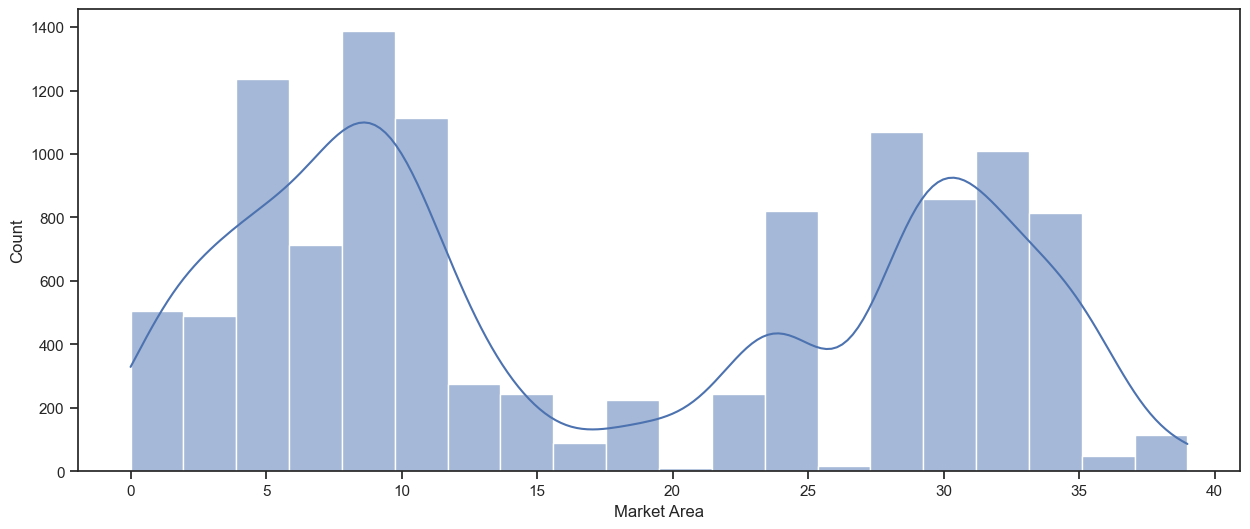

In [36]:
new_variety_tomato_data = data
new_variety_tomato_data['Market Area'] = le.fit_transform(data['Market Area'].astype(str))
sns.histplot(new_variety_tomato_data["Market Area"], kde=True)

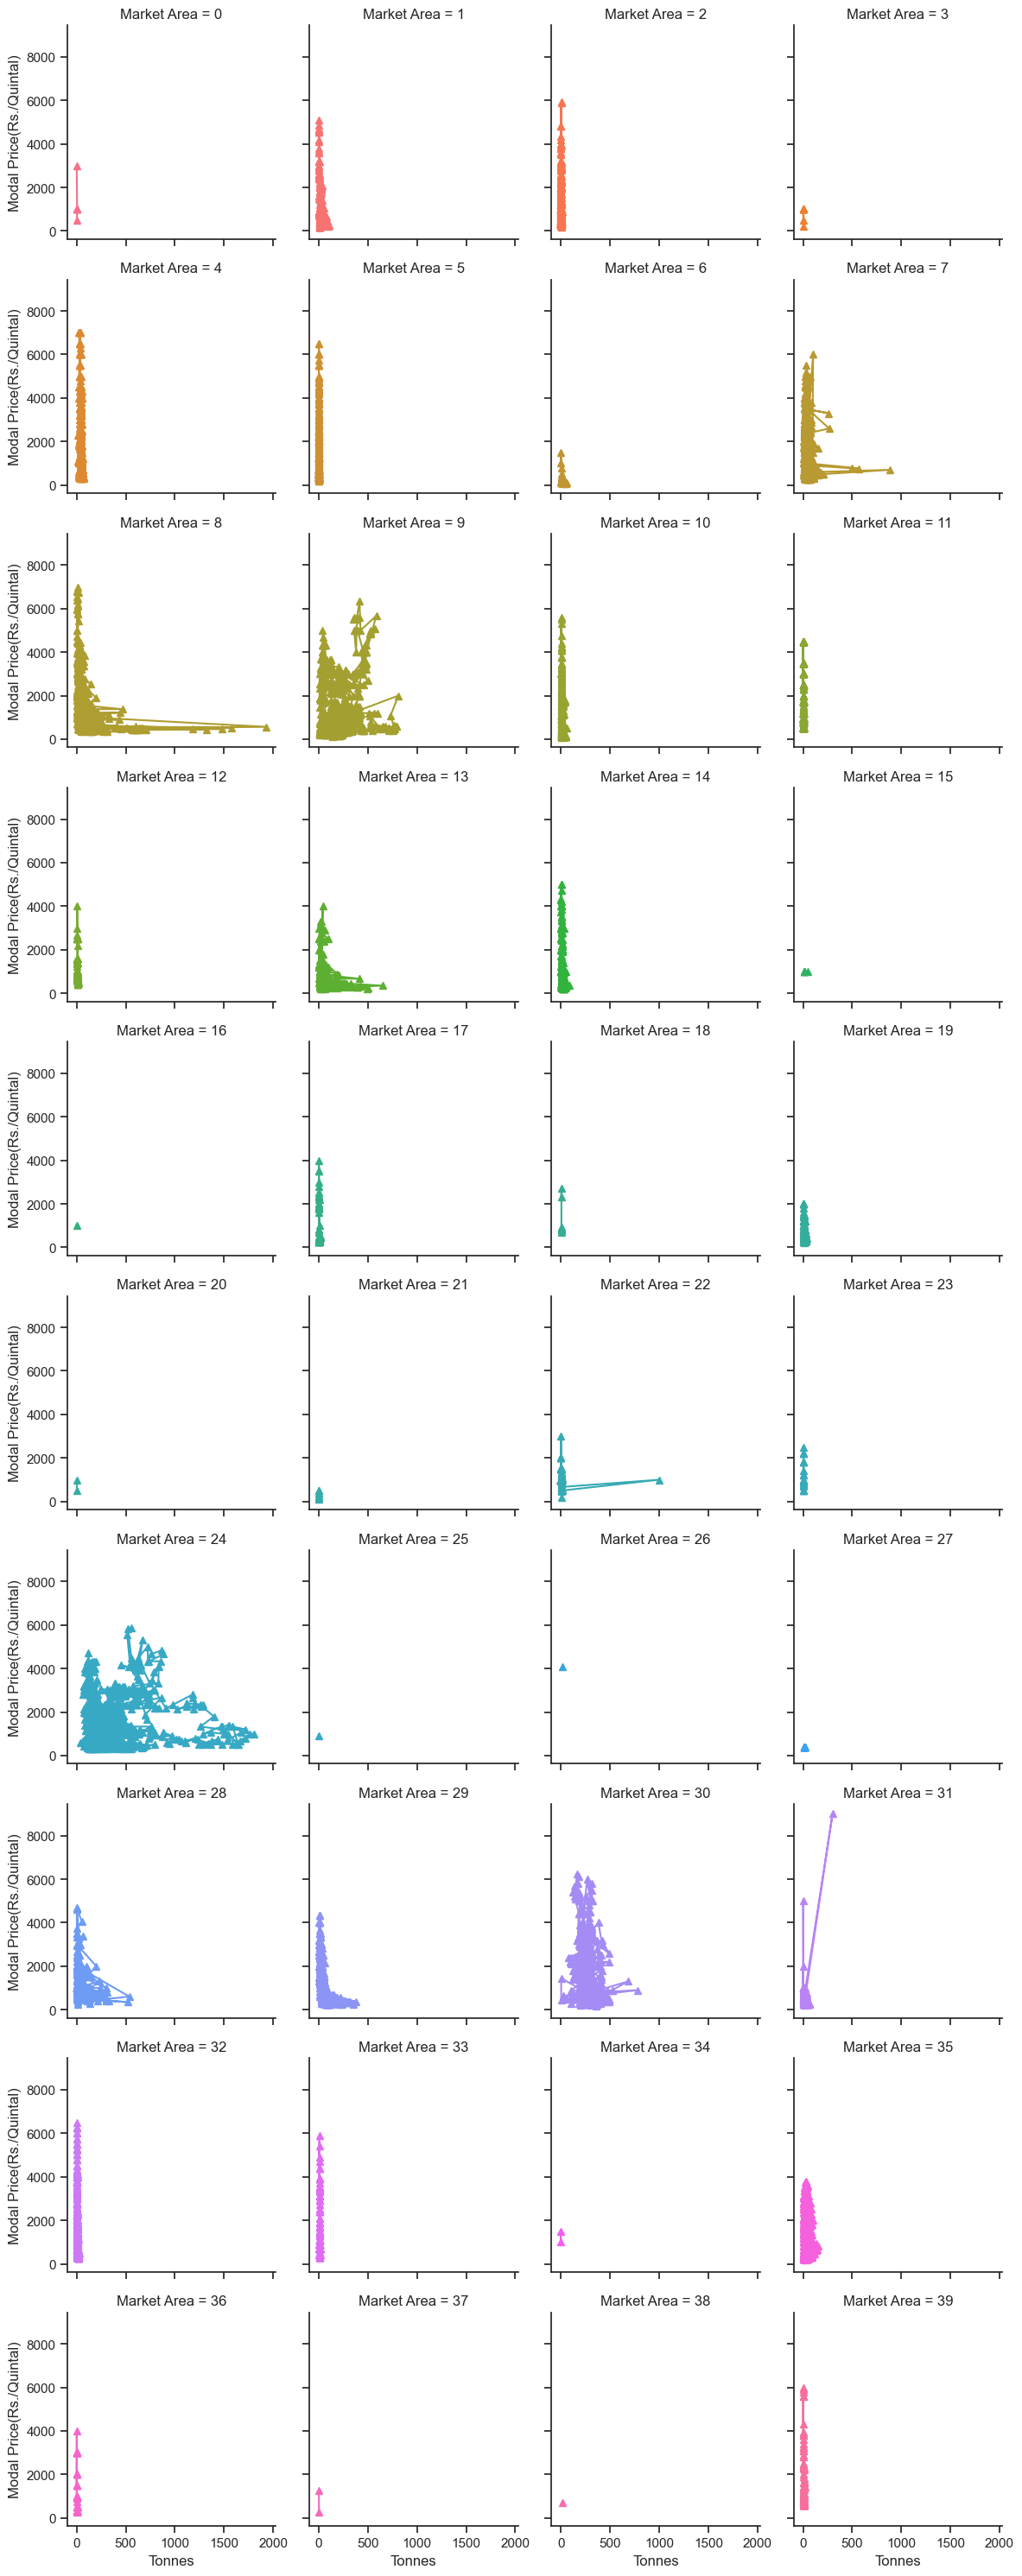

In [37]:
sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data, col="Market Area", hue="Market Area",col_wrap=4)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Tonnes","Modal Price(Rs./Quintal)", marker="^")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

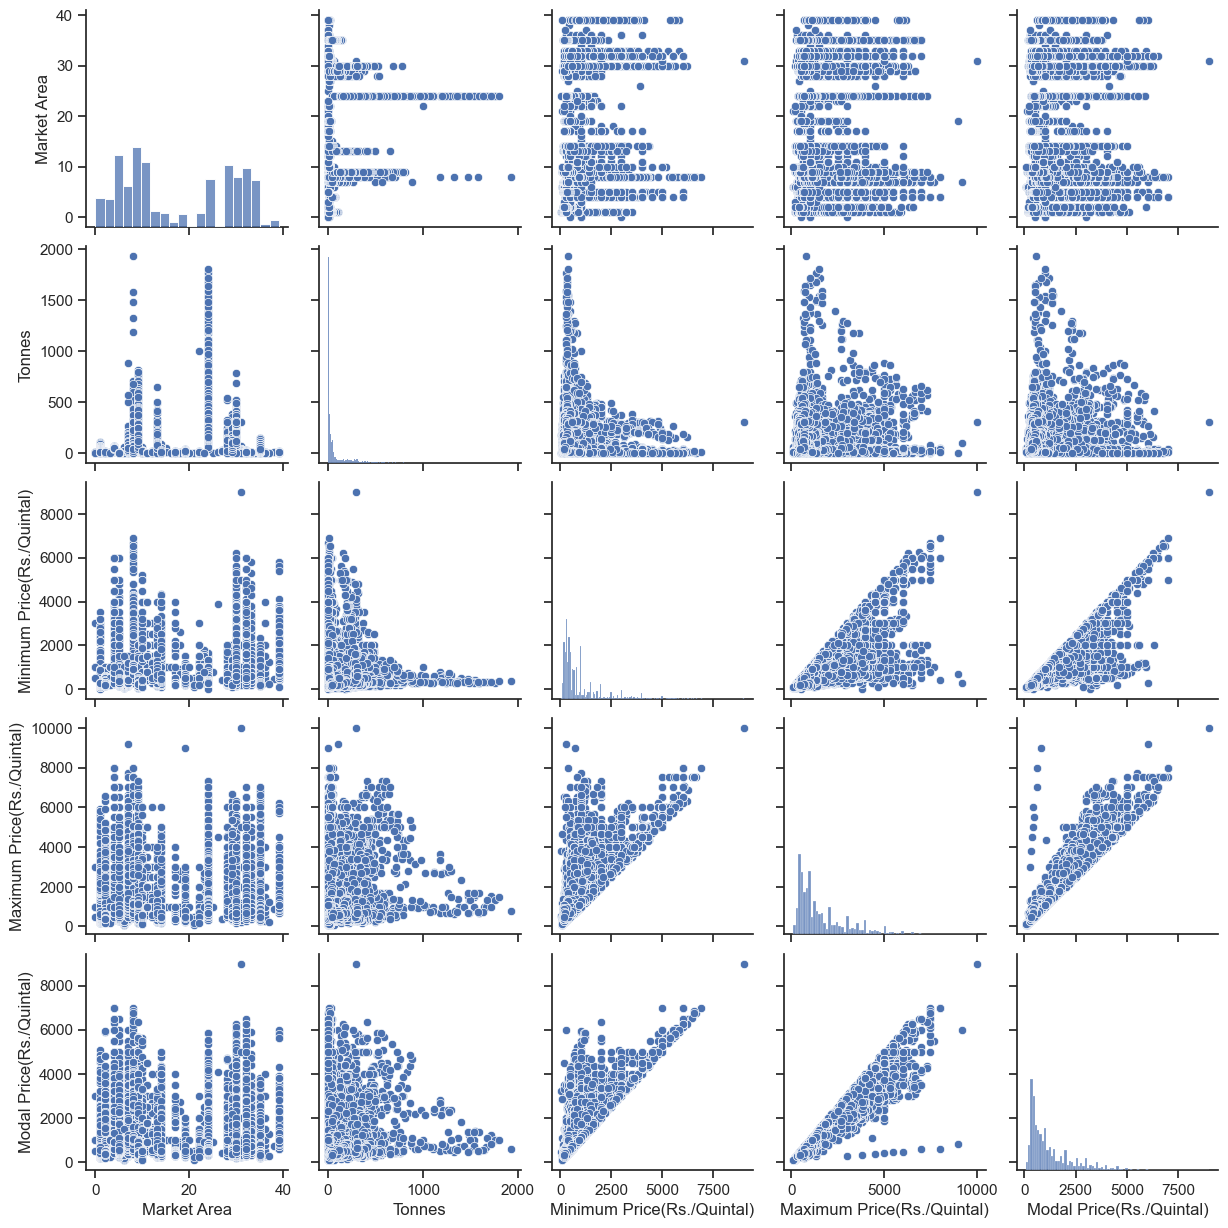

In [38]:
sns.pairplot(data)

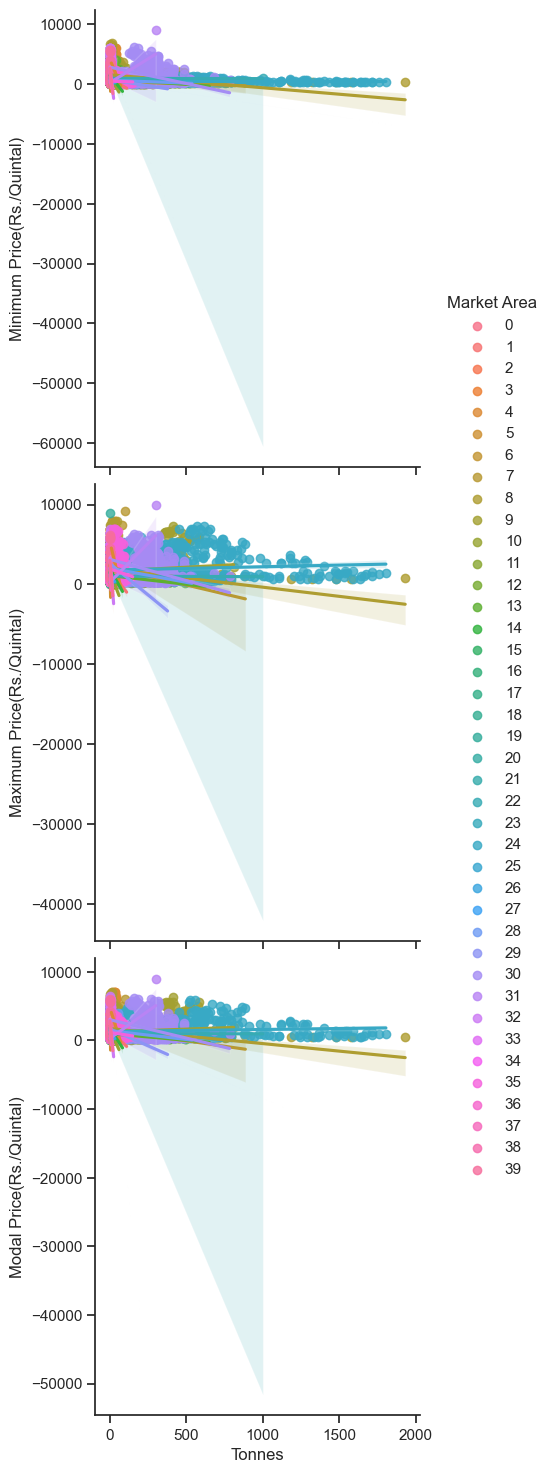

In [39]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Tonnes"],
             y_vars = ["Minimum Price(Rs./Quintal)","Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
             kind = "reg",
             hue = "Market Area")

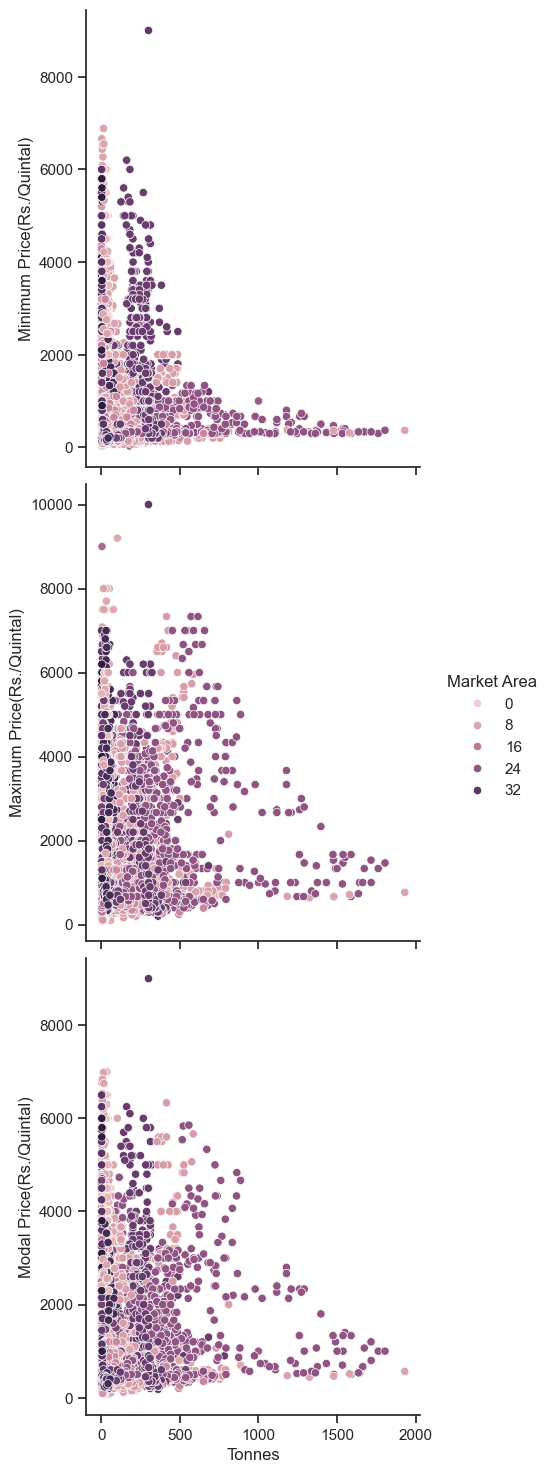

In [40]:
sns.pairplot(data, height=5, aspect=0.9, kind = "scatter",
            x_vars = ["Tonnes"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)"],
            hue = "Market Area")

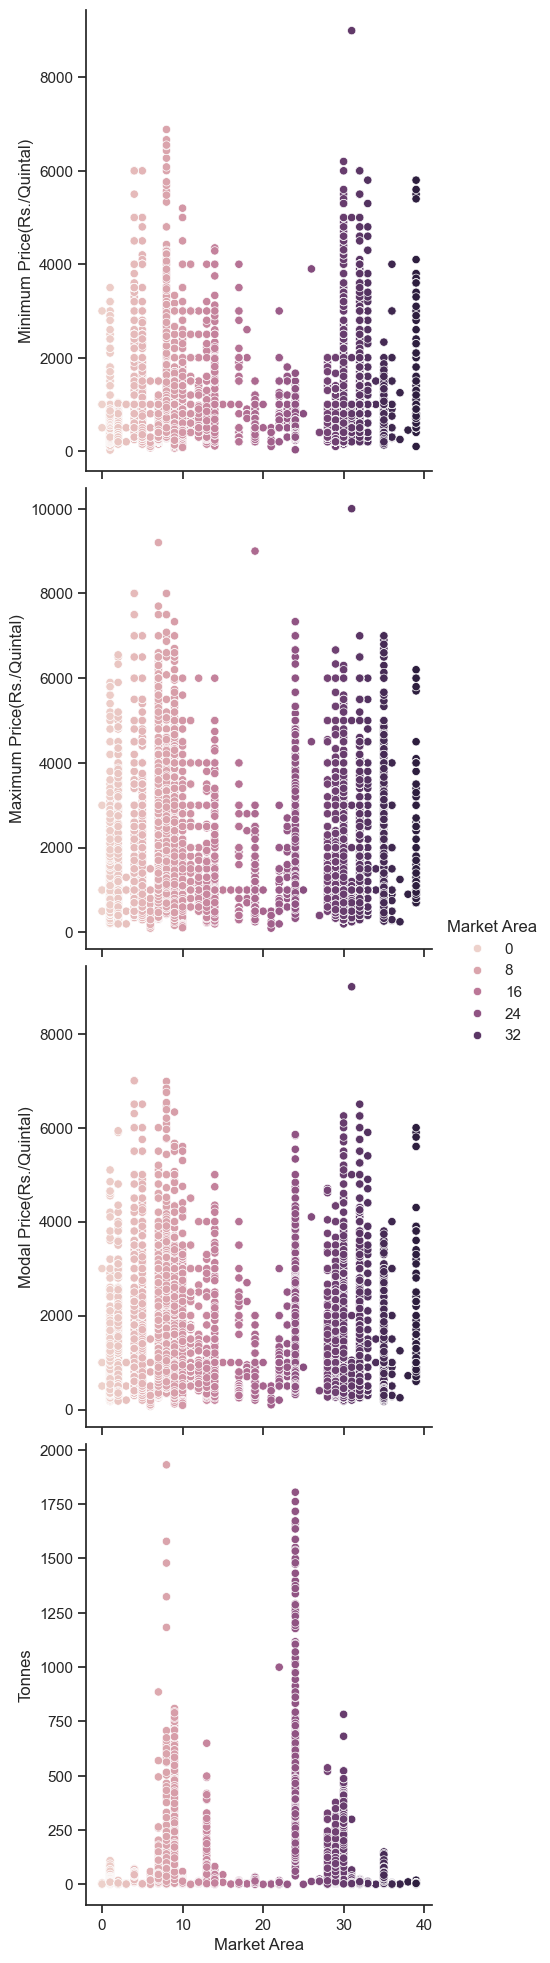

In [41]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Market Area"],
            y_vars = ["Minimum Price(Rs./Quintal)", "Maximum Price(Rs./Quintal)", "Modal Price(Rs./Quintal)", "Tonnes",],
            hue = "Market Area")

# Find what tonnes does market need

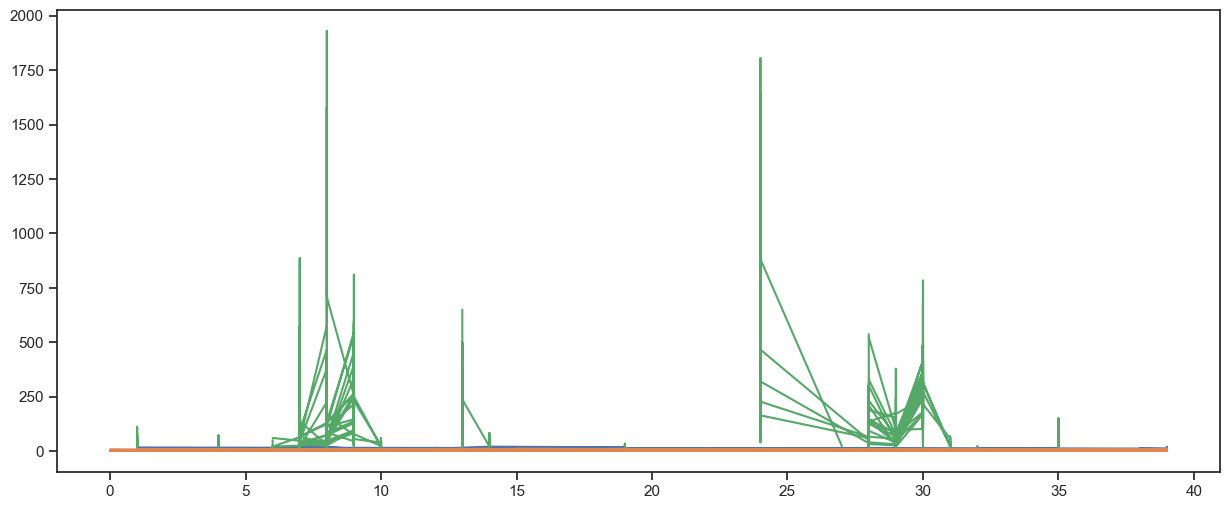

In [42]:
t = data["Market Area"]
s = data["Tonnes"]

upper = 20
lower = 10


supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

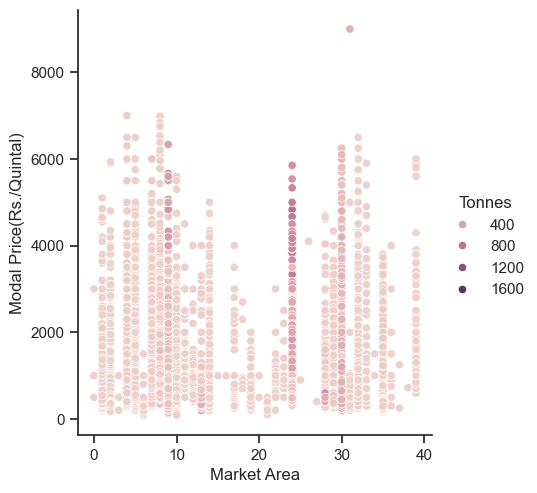

In [43]:
sns.pairplot(data, height=5, aspect=0.9,
            x_vars = ["Market Area"],
            y_vars = [ "Modal Price(Rs./Quintal)"],
            hue = "Tonnes")

for same quantity different markets have diff prices 1-10 red, shade red 10-20

In [44]:
small_tomato_data = data.drop(['Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)', 'Variety'], axis=1)
small_tomato_data.head()

Market Area      Date  Tonnes  Modal Price(Rs./Quintal)
0            1  2/1/2016     6.0                      1550
1            1  4/1/2016     6.0                      1550
2            1  5/1/2016     6.0                      2200
3            1  6/1/2016     4.0                      2400
4            1  7/1/2016     5.0                      2200

In [45]:
df3 = pd.DataFrame()

df3['datetime'] =Arrival_date
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3['modal_price'] = tomato_data["Modal Price(Rs./Quintal)"]
df3['Quantity'] = tomato_data["Tonnes"]
df3['Market'] = tomato_data["Market Area"]
# Set the datetime column as the index
df3.index = df3['datetime'] 
df3.head()

datetime  modal_price  Quantity  Market
datetime                                            
2016-01-02 2016-01-02       1550.0       6.0     1.0
2016-01-04 2016-01-04       1550.0       6.0     1.0
2016-01-05 2016-01-05       2200.0       6.0     1.0
2016-01-06 2016-01-06       2400.0       4.0     1.0
2016-01-07 2016-01-07       2200.0       5.0     1.0

ValueError: cannot reindex on an axis with duplicate labels

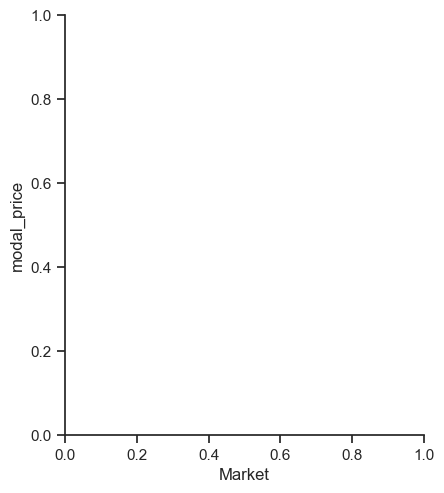

In [46]:
sns.pairplot(df3, height=5, aspect=0.9,
            x_vars = ["Market"],
            y_vars = [ "modal_price"],
            hue = "Quantity")

In [47]:
market_dates = df3.resample('M').sum()
market_dates

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/1810688750.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_dates = df3.resample('M').sum()


TypeError: datetime64 type does not support sum operations

In [48]:
df4 = pd.DataFrame()

df4['datetime'] =Arrival_date
df4['datetime'] = pd.to_datetime(df4['datetime'])
df4['Market'] = tomato_data["Market Area"]
# Set the datetime column as the index
df4.index = df3['datetime'] 
df4.tail()

market_dates = df4.resample('M').count().sum()
market_dates

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/2177305964.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_dates = df4.resample('M').count().sum()


datetime    11321
Market      11286
dtype: int64

In [49]:
market_dates = df4.resample('M').count()
market_dates

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/4238822274.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_dates = df4.resample('M').count()


datetime  Market
datetime                    
2016-01-31       320     320
2016-02-29       296     296
2016-03-31       410     410
2016-04-30       365     365
2016-05-31       370     370
2016-06-30       400     400
2016-07-31       467     467
2016-08-31       543     543
2016-09-30       456     456
2016-10-31       389     389
2016-11-30       433     433
2016-12-31       426     426
2017-01-31       361     361
2017-02-28       367     367
2017-03-31       440     440
2017-04-30       403     403
2017-05-31       458     458
2017-06-30       441     441
2017-07-31       418     418
2017-08-31       442     442
2017-09-30       424     424
2017-10-31       399     399
2017-11-30       392     384
2017-12-31       403     376
2018-01-31       424     424
2018-02-28       383     383
2018-03-31       411     411
2018-04-30       280     280

In [50]:
small_tomato_data['Market Area'] = le.fit_transform(small_tomato_data['Market Area'].astype(str))
small_tomato_data.tail()

Market Area        Date  Tonnes  Modal Price(Rs./Quintal)
11451           29  28/04/2018    33.0                       266
11452           29  29/04/2018    55.0                       400
11453           29  30/04/2018    43.0                       300
11454           33    4/4/2018     6.0                      1000
11455           33   11/4/2018     5.0                      1000

In [51]:
np.unique(small_tomato_data["Market Area"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

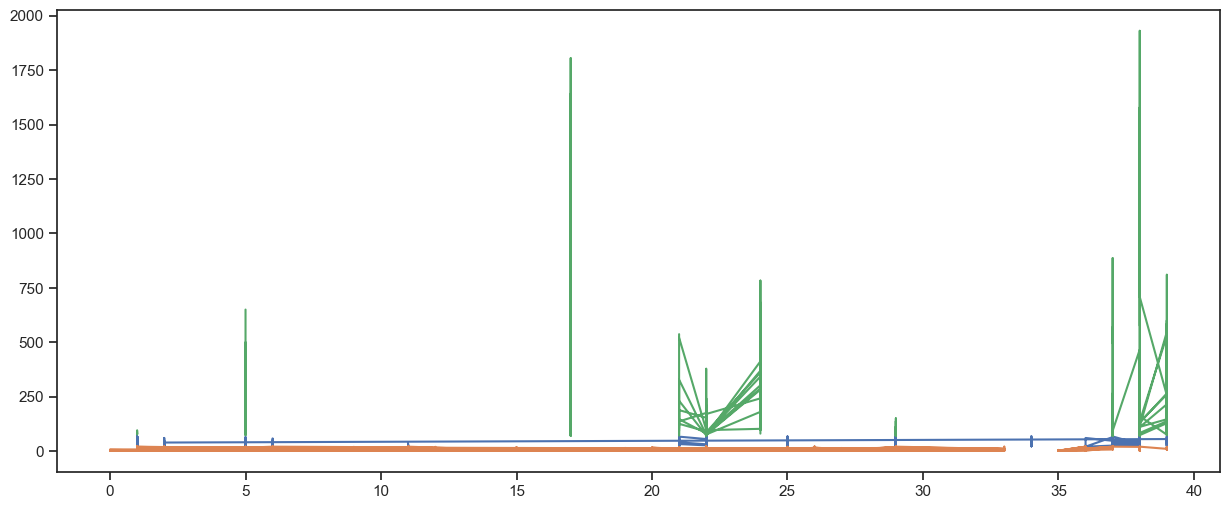

In [52]:
t = small_tomato_data["Market Area"]
s = small_tomato_data["Tonnes"]

upper = 70
lower = 20


supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

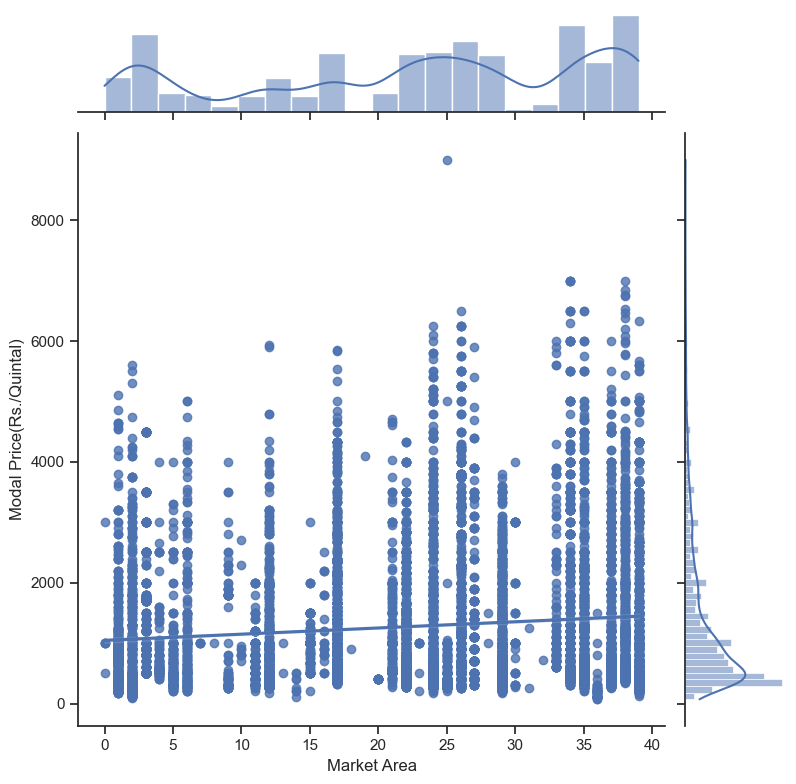

In [53]:
sns.jointplot(x='Market Area', y='Modal Price(Rs./Quintal)', data=small_tomato_data, height=8, kind="reg")

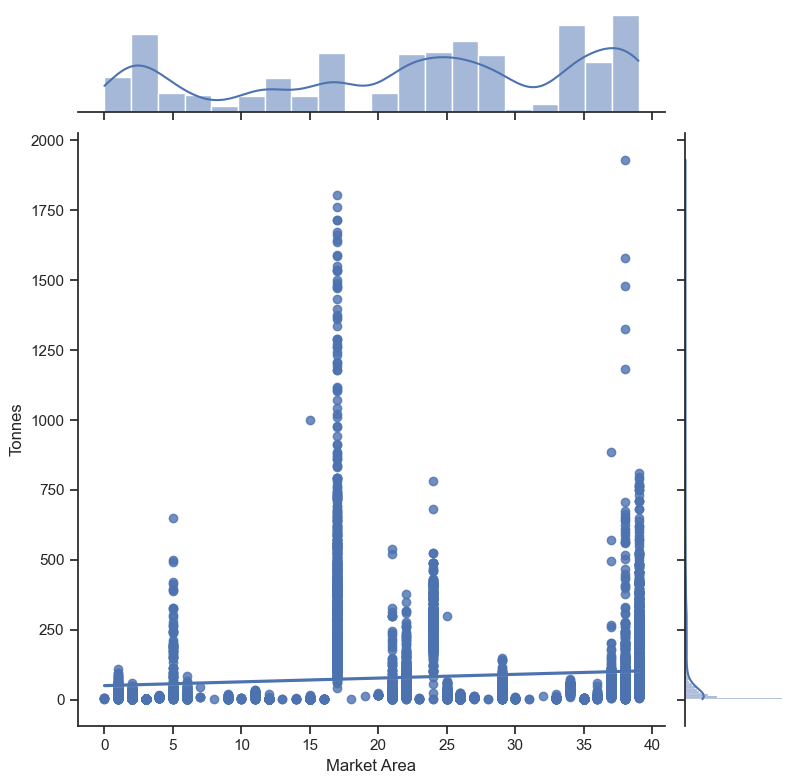

In [54]:
sns.jointplot(x='Market Area', y='Tonnes', data=small_tomato_data, height=8, kind="reg")

In [55]:
#df3.Market= le.fit_transform(df3.Market.astype(str))
df3.tail()

datetime  modal_price  Quantity  Market
datetime                                            
2018-04-28 2018-04-28        266.0      33.0    35.0
2018-04-29 2018-04-29        400.0      55.0    35.0
2018-04-30 2018-04-30        300.0      43.0    35.0
2018-04-04 2018-04-04       1000.0       6.0    39.0
2018-04-11 2018-04-11       1000.0       5.0    39.0

In [56]:
joint_dates = df3.resample('M').mean()
joint_dates

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/3058007813.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  joint_dates = df3.resample('M').mean()


datetime  modal_price    Quantity     Market
datetime                                                                    
2016-01-31 2016-01-13 03:18:00.000000000  2014.743750   43.821875  18.381250
2016-02-29 2016-02-17 12:53:30.810810880   576.628378   59.581081  18.111486
2016-03-31 2016-03-16 01:34:49.756097280   463.690244   51.060976  18.404878
2016-04-30 2016-04-15 14:00:19.726027520  1006.019178   56.717808  17.808219
2016-05-31 2016-05-16 17:11:21.081081088  2637.943243   42.181081  18.554054
2016-06-30 2016-06-16 02:02:24.000000000  3225.520000   52.720000  18.497500
2016-07-31 2016-07-16 18:48:33.918629632  1546.734475  129.730193  18.473233
2016-08-31 2016-08-15 19:08:17.237569280   556.674033  192.055249  18.261510
2016-09-30 2016-09-15 15:06:18.947368192   699.133772  113.322368  18.131579
2016-10-31 2016-10-15 19:55:40.874035968   803.326478   90.642674  18.989717
2016-11-30 2016-11-15 10:25:13.163972352   398.221709  102.309469  18.344111
2016-12-31 2016-12-15 21:00:50.704225536   390.492958   68.948357  17.659624
2017-01-31 2017-01-15 16:05:19.113573376   756.138504   46.817175  17.177285
2017-02-28 2017-02-13 14:38:54.604904704  1322.648501   43.940054  17.130790
2017-03-31 2017-03-15 18:19:38.181818112  1345.611364   47.575000  17.290909
2017-04-30 2017-04-15 13:59:42.133995008   775.677419   77.454094  17.575682
2017-05-31 2017-05-16 06:04:42.969432320   696.888646   73.133188  17.838428
2017-06-30 2017-06-15 05:59:11.020408064  1599.306122   91.918367  17.814059
2017-07-31 2017-07-15 16:35:35.885167616  3719.181818  101.143541  16.799043
2017-08-31 2017-08-15 22:22:15.746606336  2729.314480   83.368778  17.160633
2017-09-30 2017-09-15 07:55:28.301886720  1191.238208   70.103774  17.101415
2017-10-31 2017-10-16 03:40:09.022556416  1870.624060   59.867168  16.581454
2017-11-30 2017-11-15 21:18:22.040816384  2444.848958   60.291667  16.458333
2017-12-31 2017-12-16 00:50:01.488833792  1007.619681   95.388298  16.829787
2018-01-31 2018-01-15 18:47:32.830188800   465.047170  103.591981  16.136792
2018-02-28 2018-02-14 05:00:46.997389056   438.070496   83.503916  16.412533
2018-03-31 2018-03-15 20:47:17.956204288   536.632603   67.445255  16.379562
2018-04-30 2018-04-13 11:08:34.285714176   646.696429   59.985714  16.985714

In [57]:
joint_dates.tail()
joint_dates['Market'] = tomato_data["Market Area"]
joint_dates.tail()

datetime  modal_price    Quantity  Market
datetime                                                                 
2017-12-31 2017-12-16 00:50:01.488833792  1007.619681   95.388298     NaN
2018-01-31 2018-01-15 18:47:32.830188800   465.047170  103.591981     NaN
2018-02-28 2018-02-14 05:00:46.997389056   438.070496   83.503916     NaN
2018-03-31 2018-03-15 20:47:17.956204288   536.632603   67.445255     NaN
2018-04-30 2018-04-13 11:08:34.285714176   646.696429   59.985714     NaN

## Group by area and month

In [58]:
cut_tomato_data = pd.get_dummies(data, columns=['Market Area'])
cut_tomato_data.head()

Date  Tonnes Variety  Minimum Price(Rs./Quintal)  \
0  2/1/2016     6.0  Tomato                        1000   
1  4/1/2016     6.0  Tomato                         900   
2  5/1/2016     6.0  Tomato                        1400   
3  6/1/2016     4.0  Tomato                        1400   
4  7/1/2016     5.0  Tomato                        1400   

   Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  Market Area_0  \
0                        1800                      1550          False   
1                        1800                      1550          False   
2                        2500                      2200          False   
3                        3000                      2400          False   
4                        2600                      2200          False   

   Market Area_1  Market Area_2  Market Area_3  ...  Market Area_30  \
0           True          False          False  ...           False   
1           True          False          False  ...           False   
2           True          False          False  ...           False   
3           True          False          False  ...           False   
4           True          False          False  ...           False   

   Market Area_31  Market Area_32  Market Area_33  Market Area_34  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   Market Area_35  Market Area_36  Market Area_37  Market Area_38  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   Market Area_39  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 46 columns]

<Axes: xlabel='Tonnes', ylabel='Count'>

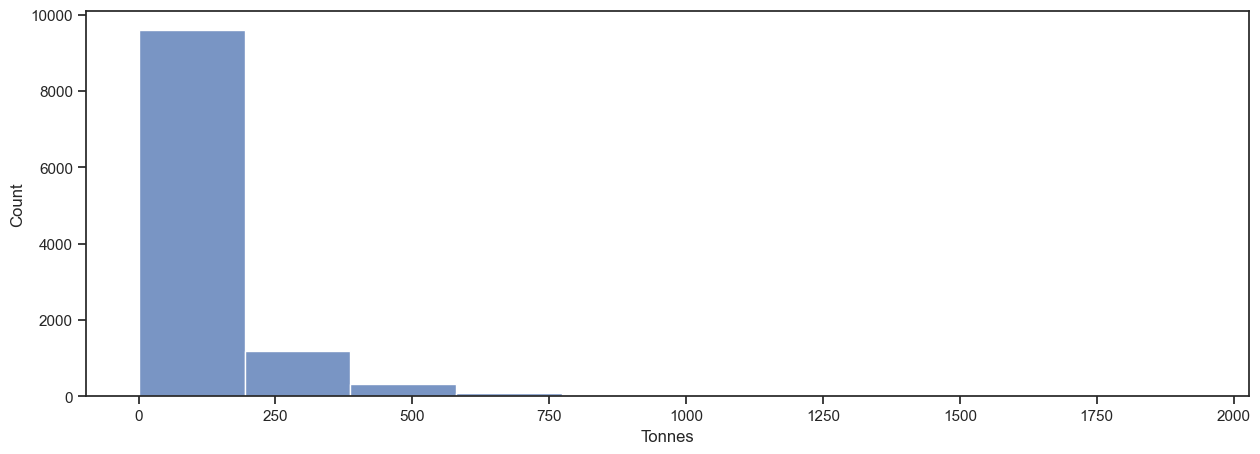

In [59]:
f, ax = plt.subplots(figsize = (15,5))
sns.histplot(cut_tomato_data['Tonnes'], bins=10, kde=False)

<Axes: xlabel='Modal Price(Rs./Quintal)', ylabel='Count'>

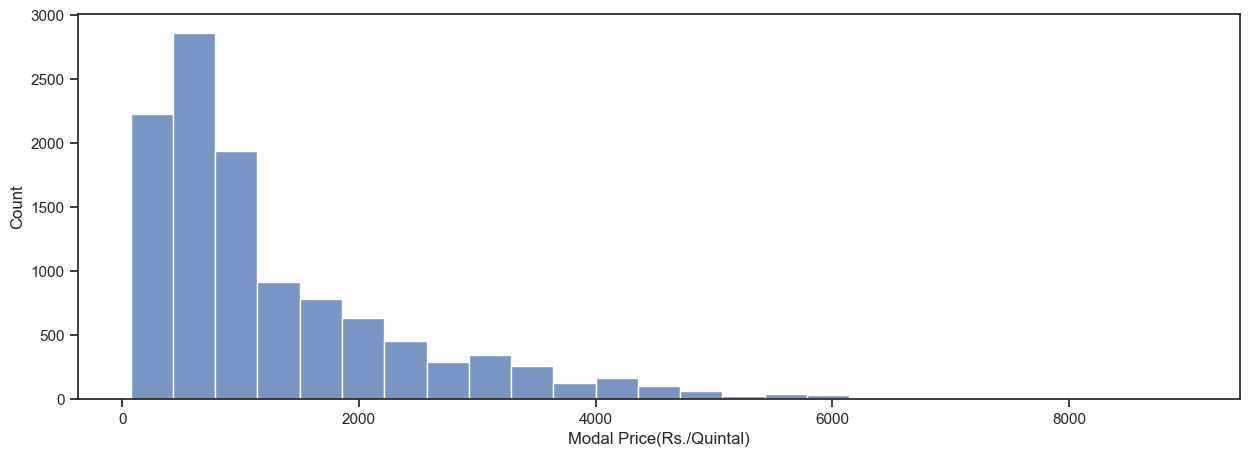

In [60]:
f, ax = plt.subplots(figsize = (15,5))
sns.histplot(cut_tomato_data['Modal Price(Rs./Quintal)'], bins=25, kde=False)

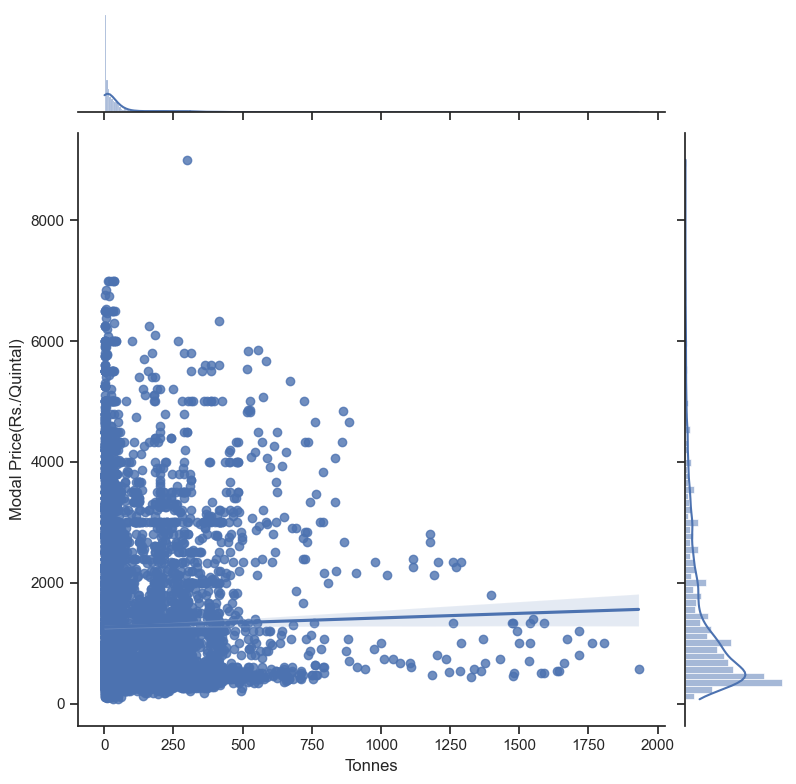

In [61]:
sns.jointplot(x='Tonnes', y='Modal Price(Rs./Quintal)', data=cut_tomato_data, height=8, kind="reg")

In [62]:
df4 = pd.DataFrame()

df4['datetime'] =Arrival_date
df4['datetime'] = pd.to_datetime(df4['datetime'])

# Set the datetime column as the index
df4.index = df3['datetime'] 
df4.tail()

market_dates = df4.resample('M').count()
market_dates

/var/folders/wv/6gs8t6nd589fszn1qr2607880000gn/T/ipykernel_88614/2152370924.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_dates = df4.resample('M').count()


datetime
datetime            
2016-01-31       320
2016-02-29       296
2016-03-31       410
2016-04-30       365
2016-05-31       370
2016-06-30       400
2016-07-31       467
2016-08-31       543
2016-09-30       456
2016-10-31       389
2016-11-30       433
2016-12-31       426
2017-01-31       361
2017-02-28       367
2017-03-31       440
2017-04-30       403
2017-05-31       458
2017-06-30       441
2017-07-31       418
2017-08-31       442
2017-09-30       424
2017-10-31       399
2017-11-30       392
2017-12-31       403
2018-01-31       424
2018-02-28       383
2018-03-31       411
2018-04-30       280

In [63]:
cut_tomato_data = cut_tomato_data.drop(['Variety', 'Date'], axis=1)
cut_tomato_data.tail()

Tonnes  Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
11451    33.0                         166                         600   
11452    55.0                         233                         700   
11453    43.0                         200                         466   
11454     6.0                         900                        1100   
11455     5.0                         900                        1100   

       Modal Price(Rs./Quintal)  Market Area_0  Market Area_1  Market Area_2  \
11451                       266          False          False          False   
11452                       400          False          False          False   
11453                       300          False          False          False   
11454                      1000          False          False          False   
11455                      1000          False          False          False   

       Market Area_3  Market Area_4  Market Area_5  ...  Market Area_30  \
11451          False          False          False  ...           False   
11452          False          False          False  ...           False   
11453          False          False          False  ...           False   
11454          False          False          False  ...           False   
11455          False          False          False  ...           False   

       Market Area_31  Market Area_32  Market Area_33  Market Area_34  \
11451           False           False           False           False   
11452           False           False           False           False   
11453           False           False           False           False   
11454           False           False           False           False   
11455           False           False           False           False   

       Market Area_35  Market Area_36  Market Area_37  Market Area_38  \
11451            True           False           False           False   
11452            True           False           False           False   
11453            True           False           False           False   
11454           False           False           False           False   
11455           False           False           False           False   

       Market Area_39  
11451           False  
11452           False  
11453           False  
11454            True  
11455            True  

[5 rows x 44 columns]

In [64]:
cut_tomato_data['Modal Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Modal Price(Rs./Quintal)'], errors='coerce')
cut_tomato_data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Minimum Price(Rs./Quintal)'], errors='coerce')
cut_tomato_data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(cut_tomato_data['Maximum Price(Rs./Quintal)'], errors='coerce')

In [67]:
cut_tomato_data.describe()

Tonnes  Minimum Price(Rs./Quintal)  Maximum Price(Rs./Quintal)  \
count  11286.000000                11286.000000                11286.000000   
mean      80.351763                  865.686691                 1614.727096   
std      155.098364                  925.624774                 1385.597676   
min        1.000000                   22.000000                  100.000000   
25%        4.000000                  300.000000                  600.000000   
50%       19.000000                  500.000000                 1000.000000   
75%       70.000000                 1000.000000                 2135.000000   
max     1931.000000                 9000.000000                10000.000000   

       Modal Price(Rs./Quintal)  
count              11286.000000  
mean                1277.500177  
std                 1125.409306  
min                   70.000000  
25%                  500.000000  
50%                  900.000000  
75%                 1748.500000  
max                 9000.000000

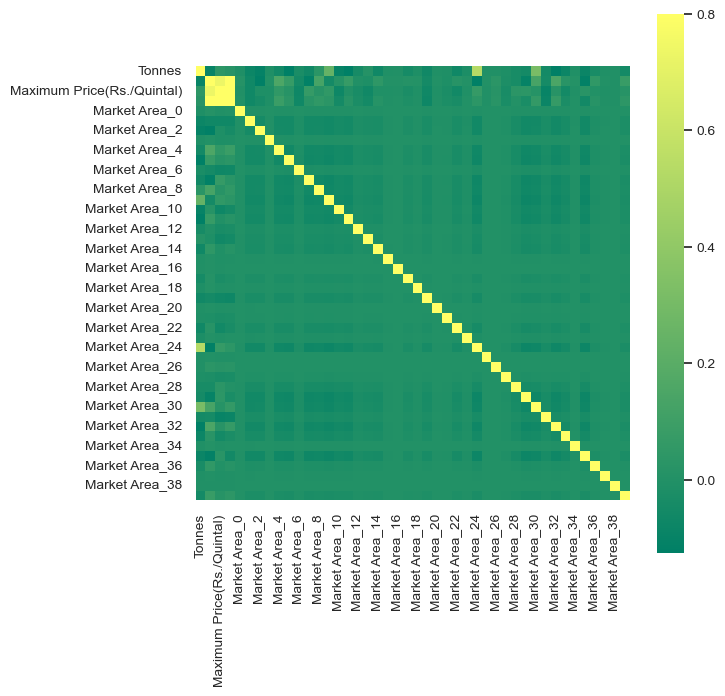

In [68]:
# Aim : To see which input features strongly corelate with other input features
corrmat = cut_tomato_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale = 0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=False, fmt='.2f', cmap = "summer")
# cmap can
plt.show()

3 prices are highly correlated <br>
kolar 50% tonnes


In [69]:
ml_tomato_data = data.drop(['Date','Variety'], axis=1)
ml_tomato_data.head()

Market Area  Tonnes  Minimum Price(Rs./Quintal)  \
0            1     6.0                        1000   
1            1     6.0                         900   
2            1     6.0                        1400   
3            1     4.0                        1400   
4            1     5.0                        1400   

   Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
0                        1800                      1550  
1                        1800                      1550  
2                        2500                      2200  
3                        3000                      2400  
4                        2600                      2200

In [70]:
from sklearn import preprocessing
# Converting categorical data to numeric form
le = preprocessing.LabelEncoder()
ml_tomato_data['Market Area'] = le.fit_transform(ml_tomato_data['Market Area'].astype(str))
ml_tomato_data.tail()

Market Area  Tonnes  Minimum Price(Rs./Quintal)  \
11451           29    33.0                         166   
11452           29    55.0                         233   
11453           29    43.0                         200   
11454           33     6.0                         900   
11455           33     5.0                         900   

       Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
11451                         600                       266  
11452                         700                       400  
11453                         466                       300  
11454                        1100                      1000  
11455                        1100                      1000

In [71]:
ml_tomato_data.describe()

Market Area        Tonnes  Minimum Price(Rs./Quintal)  \
count  11286.000000  11286.000000                11286.000000   
mean      22.636718     80.351763                  865.686691   
std       12.357611    155.098364                  925.624774   
min        0.000000      1.000000                   22.000000   
25%       12.000000      4.000000                  300.000000   
50%       24.000000     19.000000                  500.000000   
75%       34.000000     70.000000                 1000.000000   
max       39.000000   1931.000000                 9000.000000   

       Maximum Price(Rs./Quintal)  Modal Price(Rs./Quintal)  
count                11286.000000              11286.000000  
mean                  1614.727096               1277.500177  
std                   1385.597676               1125.409306  
min                    100.000000                 70.000000  
25%                    600.000000                500.000000  
50%                   1000.000000                900.000000  
75%                   2135.000000               1748.500000  
max                  10000.000000               9000.000000

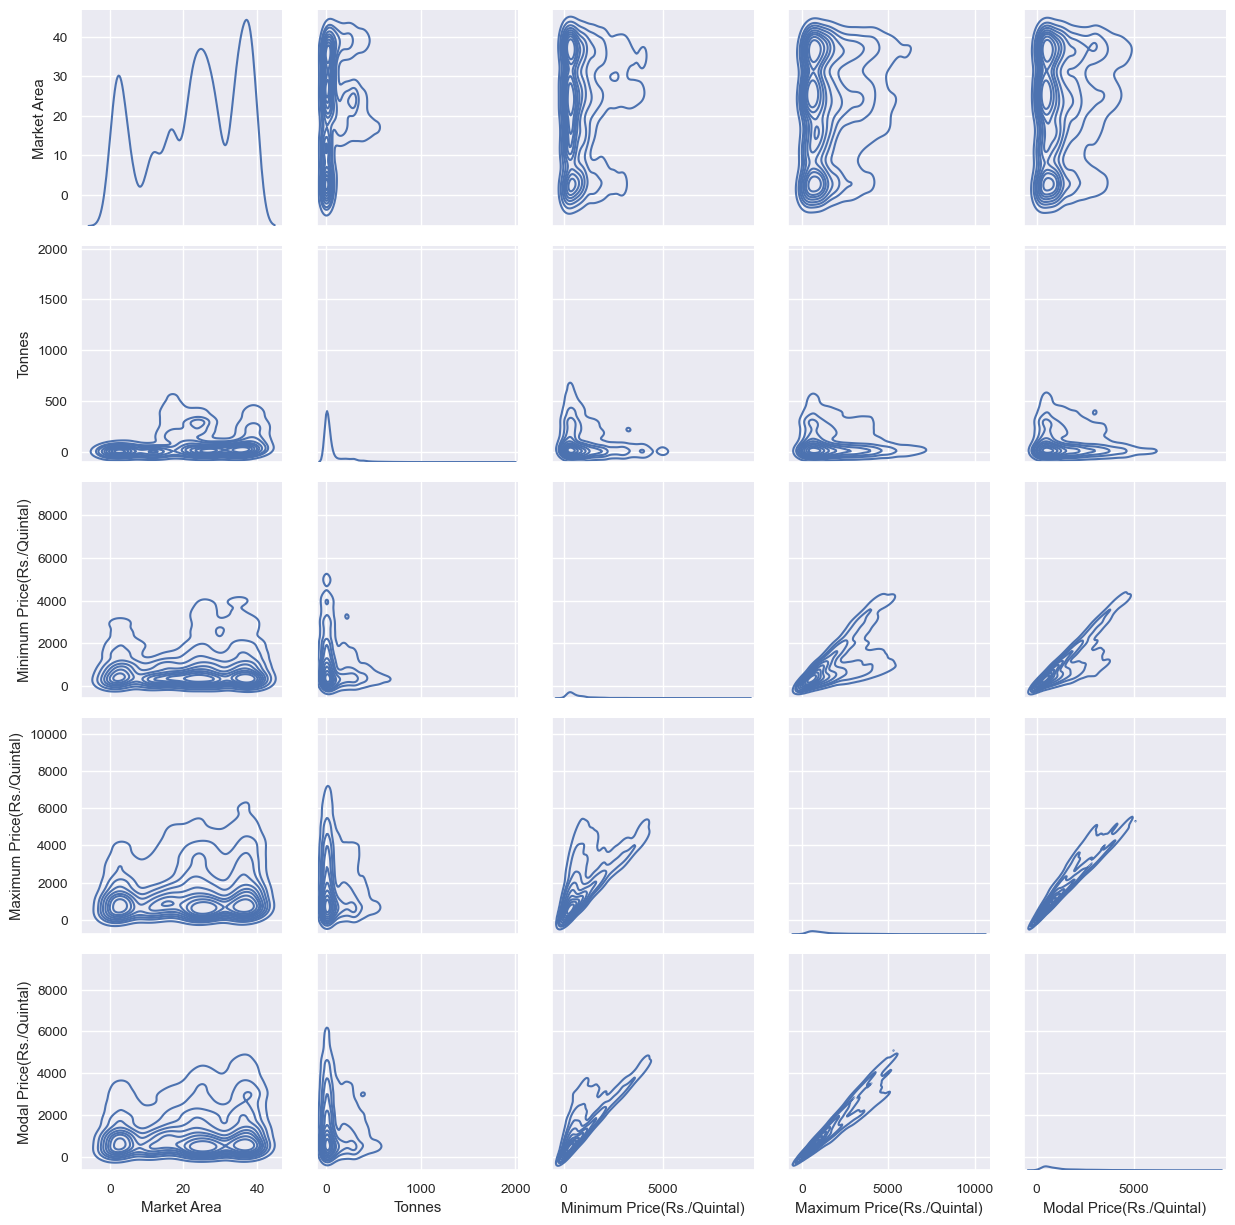

In [72]:
g = sns.PairGrid(ml_tomato_data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)#, n_levels=6);

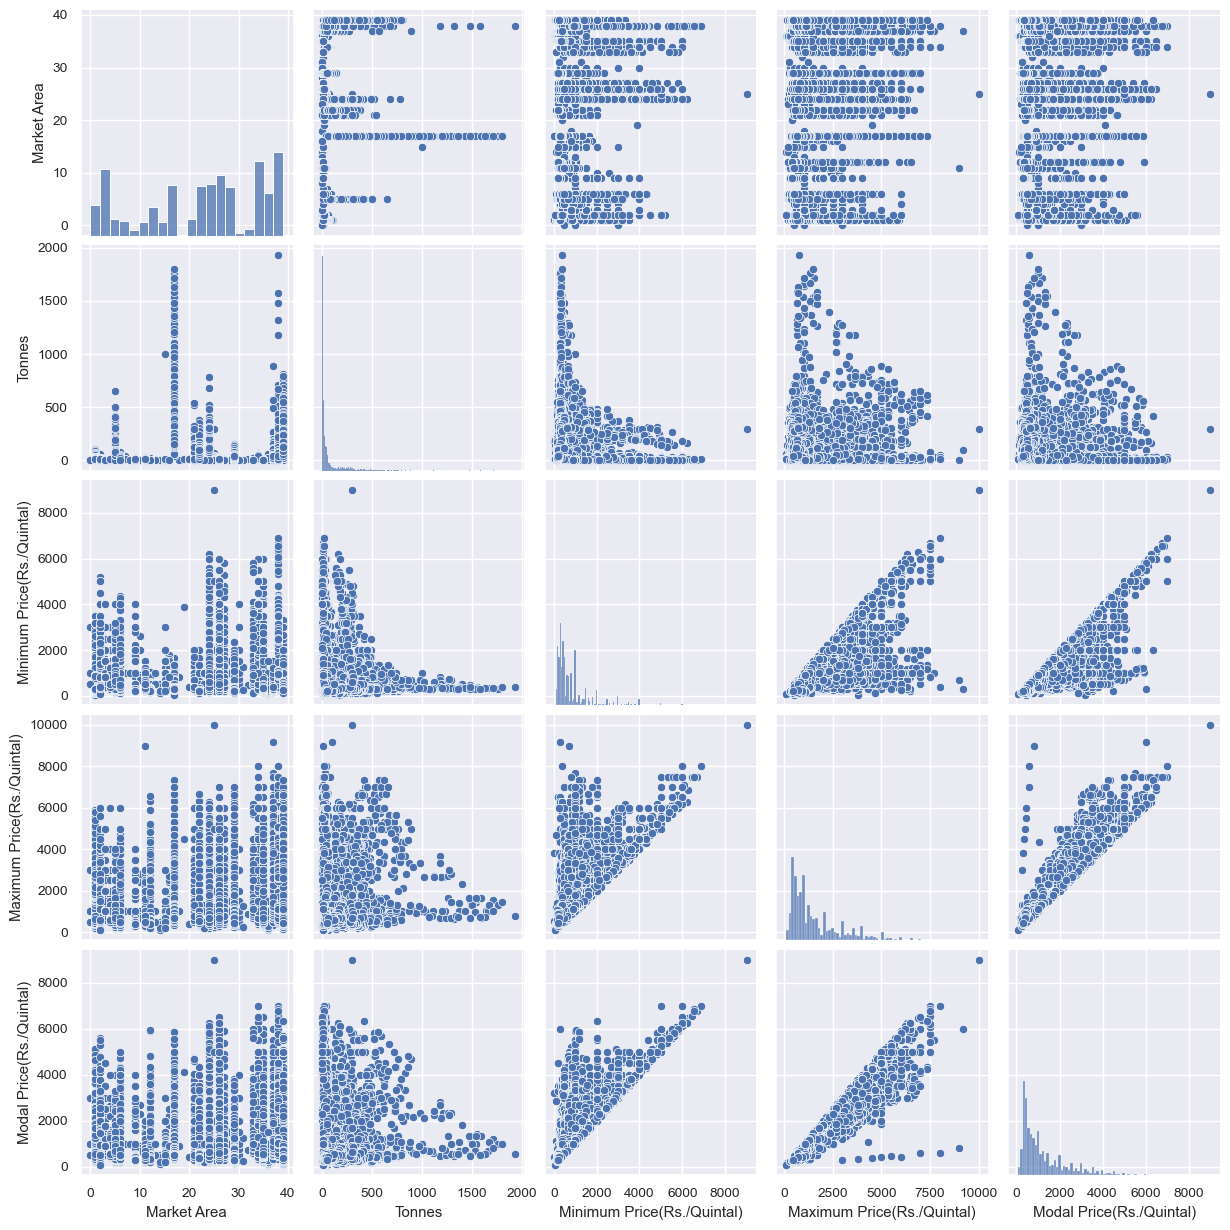

In [73]:
sns.pairplot(ml_tomato_data)